# Movilidad Sustentable
## Ciencia de Datos & Inteligencia de Negocios
### Analisis Exploratorio de Datos (EDA)

### Configuración

In [1]:
'''
Bicicletas: Recorridos
Clima: PRCP TAVG TEMP[C] HUM[%] PNM[hPa] DD[gr] FF[km/hr]                                                 
2020-2021
Data acquisition & wrangling
'''

import os
import sys
# import urllib.request

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot, figure
# import matplotlib
import seaborn as sns
# pyplot.rcParams.keys()
pyplot.rcParams['legend.loc'] = 'best'
pyplot.rcParams['figure.figsize'] = ( 20, 5 )
pyplot.rcParams['figure.dpi'] = 320
pyplot.style.use( 'ggplot' )
datadir = 'datasets/'

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount(
      '/content/drive/', 
    )
    if drive:
        datadir = '/content/drive/MyDrive/Academicos/UTN/BI/datasets/'
else:
    print('Not running on CoLab')

In [2]:
datasets = {
  'recorridos' : {
    'df'     : pd.DataFrame(),
    'local'  : datadir + 'recorridos.zip',
  },
  'estaciones' : {
    'df'     : pd.DataFrame(),
    'local'  : datadir + 'estaciones.csv',
  }
}

In [3]:
'''
Cargar datasets
'''
def cargar_datasets( insumos ):
    for i in insumos:
        if 'zip' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_csv(
                insumos[i]['local'],
                compression = 'zip',
                encoding = 'utf-8', 
            )
        if 'csv' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_csv(
                insumos[i]['local'],
            )
        if 'xlsx' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_excel(
                insumos[i]['local'],
            )
        
        print( 'Cargado: ', insumos[i]['local'] )
    return cargar_datasets

In [4]:
insumos = cargar_datasets( datasets )

Cargado:  datasets/recorridos.zip
Cargado:  datasets/estaciones.csv


In [5]:
# FILL NAN CON PROMEDIO 
for c in datasets['recorridos']['df'].columns:
    nulls = datasets['recorridos']['df'][c].isnull().sum()
    if nulls:
        mean = datasets['recorridos']['df'][c].mean()
        fill = mean
        types = datasets['recorridos']['df'][c].dtypes
        print( 'Filling:',c, nulls, types, fill)
        datasets['recorridos']['df'][c].fillna( mean, inplace = True)


Filling: DD 14350 float64 156.64104709819665
Filling: FF 14350 float64 14.931178295966397
Filling: HUM 14350 float64 64.6412668564204
Filling: PNM 14350 float64 1015.1488488165911
Filling: TEMP 14350 float64 20.561729029970913
Filling: PRCP 21005 float64 0.9043308412575622
Filling: TAVG 21005 float64 19.582630359747565


## Analisis Exploratorio de Datos (EDA)

In [13]:
datasets['recorridos']['df'].head(10)
# print(datasets['recorridos']['df'].head(10).to_latex(index=False)) 

duracion  usuario_id  origen_id    origen_nombre         origen_fecha  \
0       882      666202        116  HOSPITAL ALEMÁN  2020-12-31 23:54:22   
1       894      332689        116  HOSPITAL ALEMÁN  2020-12-29 12:39:18   
2      1361       57949        116  HOSPITAL ALEMÁN  2020-12-21 21:21:38   
3      1010      454846        116  HOSPITAL ALEMÁN  2020-12-20 21:58:19   
4      1490      690975        116  HOSPITAL ALEMÁN  2020-12-20 13:32:53   
5       976      698489        116  HOSPITAL ALEMÁN  2020-12-19 17:24:42   
6      1519       69834        116  HOSPITAL ALEMÁN  2020-12-17 15:07:28   
7       793       28640        116  HOSPITAL ALEMÁN  2020-12-15 22:47:37   
8       981      107392        116  HOSPITAL ALEMÁN  2020-12-14 18:12:43   
9      1431      113062        116  HOSPITAL ALEMÁN  2020-12-14 18:06:01   

   origen_direccion  destino_id     destino_nombre        destino_fecha  \
0  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2021-01-01 00:09:04   
1  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-29 12:54:12   
2  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-21 21:44:19   
3  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-20 22:15:09   
4  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-20 13:57:43   
5  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-19 17:40:58   
6  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-17 15:32:47   
7  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-15 23:00:50   
8  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-14 18:29:04   
9  BERUTI & ECUADOR         142  ARMENIA Y GORRITI  2020-12-14 18:29:52   

        fecha  ...  vuelta  distancia  velocidad_kmm     DD    FF   HUM  \
0  2020-12-31  ...       0       2.43       0.173571  320.0  17.0  45.0   
1  2020-12-29  ...       0       2.43       0.173571   50.0  11.0  70.0   
2  2020-12-21  ...       0       2.43       0.110455   90.0  13.0  71.0   
3  2020-12-20  ...       0       2.43       0.151875  200.0   7.0  38.0   
4  2020-12-20  ...       0       2.43       0.101250  230.0  20.0  39.0   
5  2020-12-19  ...       0       2.43       0.151875  270.0  39.0  50.0   
6  2020-12-17  ...       0       2.43       0.097200   90.0  15.0  64.0   
7  2020-12-15  ...       0       2.43       0.186923  110.0  33.0  62.0   
8  2020-12-14  ...       0       2.43       0.151875  340.0  24.0  30.0   
9  2020-12-14  ...       0       2.43       0.105652  340.0  24.0  30.0   

      PNM  TEMP  PRCP  TAVG  
0  1013.2  22.7   0.0  22.3  
1  1008.6  26.4   0.0  26.1  
2  1016.3  21.1   0.0  19.6  
3  1014.0  20.5   0.0  18.6  
4  1012.1  20.6   0.0  18.6  
5   999.4  22.6   0.0  23.8  
6  1011.2  26.9   0.0  23.1  
7  1015.1  18.1   0.0  20.5  
8  1005.3  26.9   0.0  22.1  
9  1005.3  26.9   0.0  22.1  

[10 rows x 29 columns]

### ANALISIS DE SERIES DE TIEMPO
- Diaria (delta)
- Estacionalidad semanal
- Estacionalidad diaria

In [6]:
### DIARIO
diaria =  datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id','fecha',]
).agg(
  viajes = ( 'origen_id',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
  distancia = ( 'distancia',  'mean'),
)
diaria = diaria.pivot_table(
    index = [ 'origen_nombre', 'origen_id', ],
    columns = ['fecha'],
    values = ['viajes', 'duracion', 'distancia'],
    fill_value =0,
).sort_values( 'origen_id' )

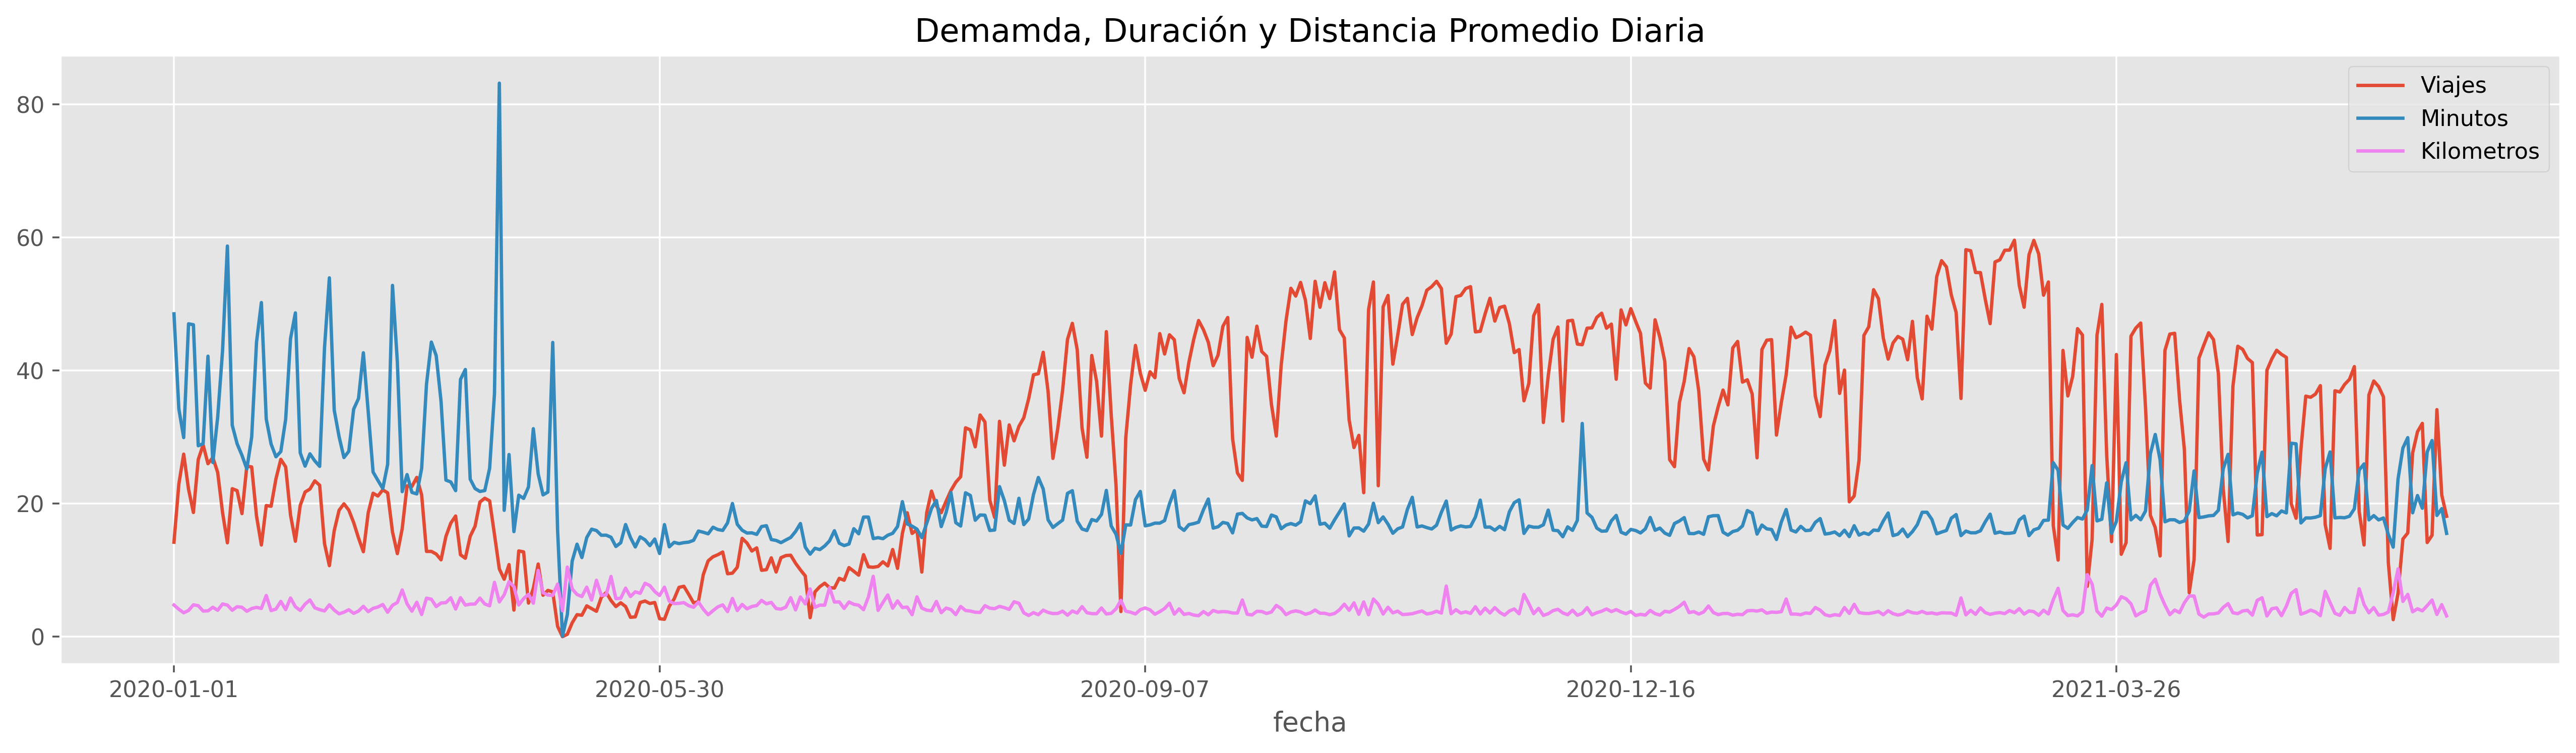

In [7]:
diaria['viajes'].mean().plot( label = 'Viajes' )
diaria['duracion'].mean().plot( label = 'Minutos')
diaria['distancia'].max().plot( label = 'Kilometros', color={ 'Kilometros': 'violet' } )
pyplot.legend( loc = 'best' )
pyplot.title( 'Demamda, Duración y Distancia Promedio Diaria' )
pyplot.show()

In [25]:
# DIA DE MAS DEMANDA 2021-03-05 14061
diaria['viajes'].sum()[ 
    diaria['viajes'].sum() == diaria['viajes'].sum().max()
]

fecha
2021-03-05    14061
dtype: int64

### ESTACIONALIDAD SEMANAL

In [8]:
semana = datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id','wdia',]
).agg(
  salidas = ( 'wdia',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
  distancia = ( 'distancia',  'mean'),
)
semana = semana.pivot_table(
    index = [ 'origen_nombre', 'origen_id', ],
    columns = ['wdia'],
    values = ['salidas', 'duracion', 'distancia'],
    fill_value = 0,
).sort_values('origen_id')

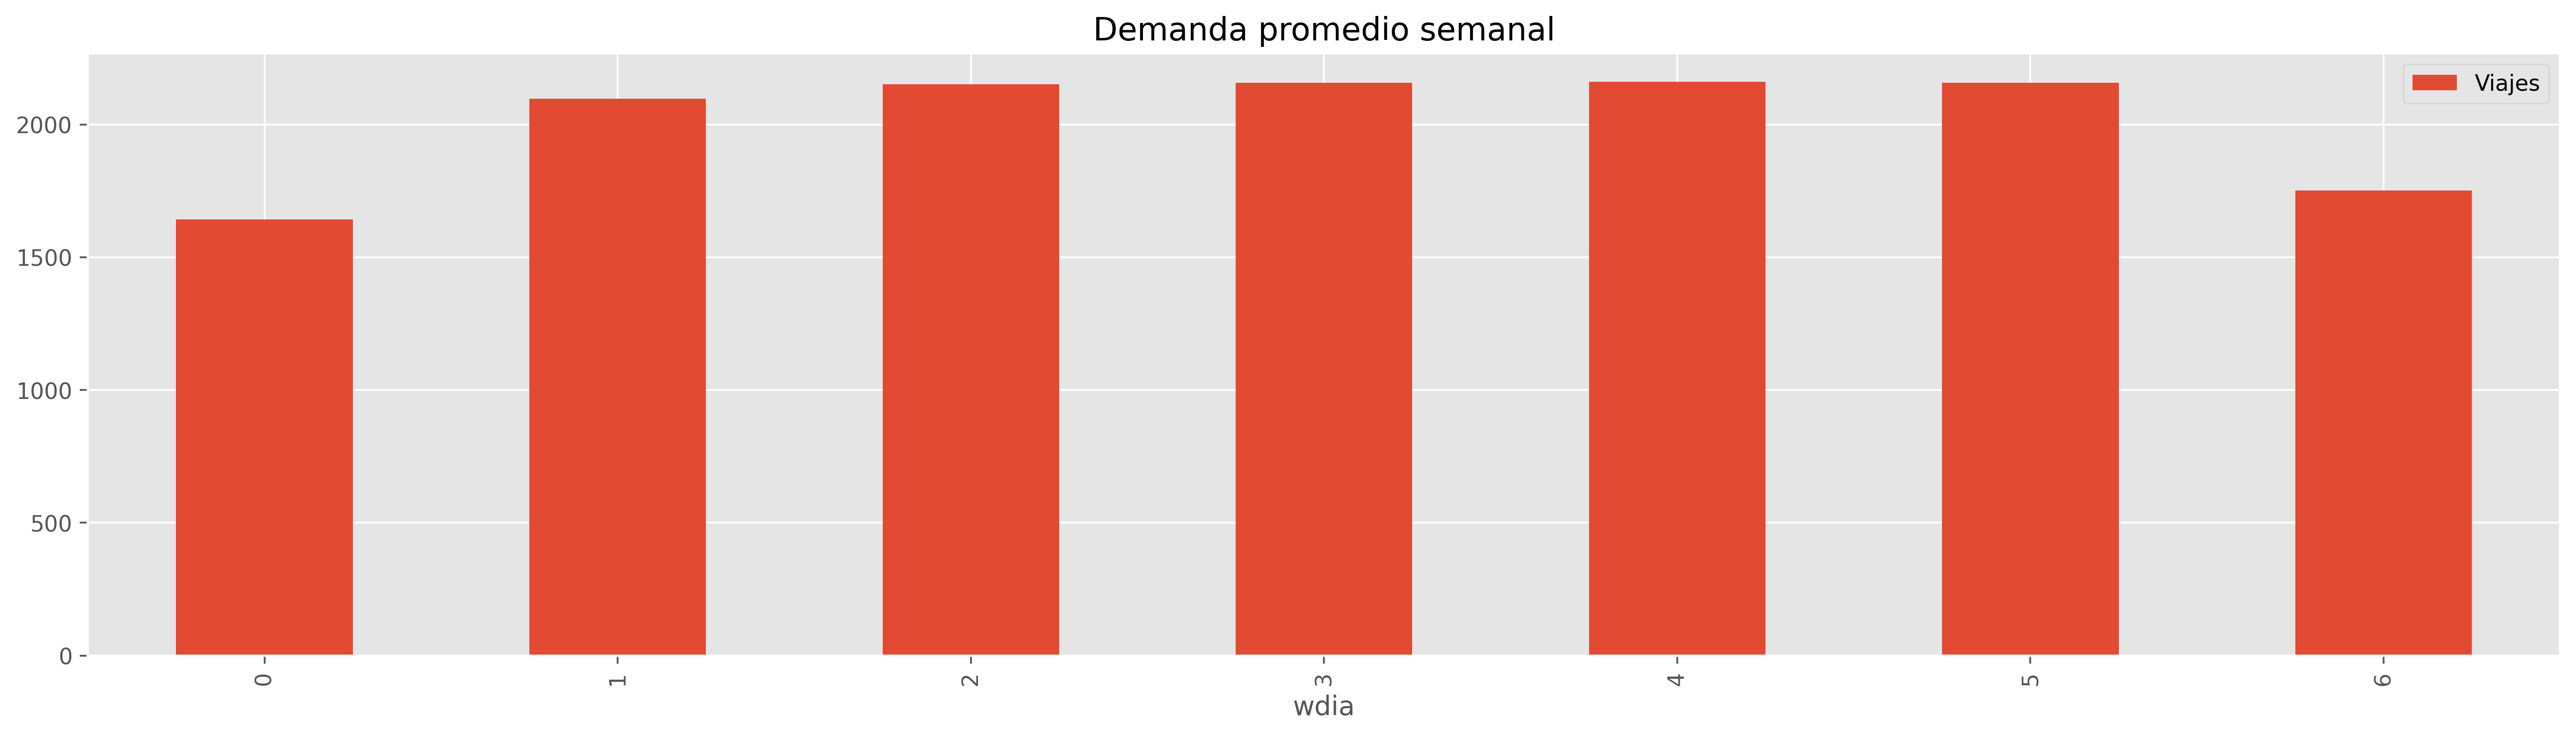

In [15]:
semana['salidas'].mean().plot( kind = 'bar', label = 'Viajes')
pyplot.legend( loc = 'best' )
pyplot.title( 'Demanda promedio semanal' )
pyplot.show()

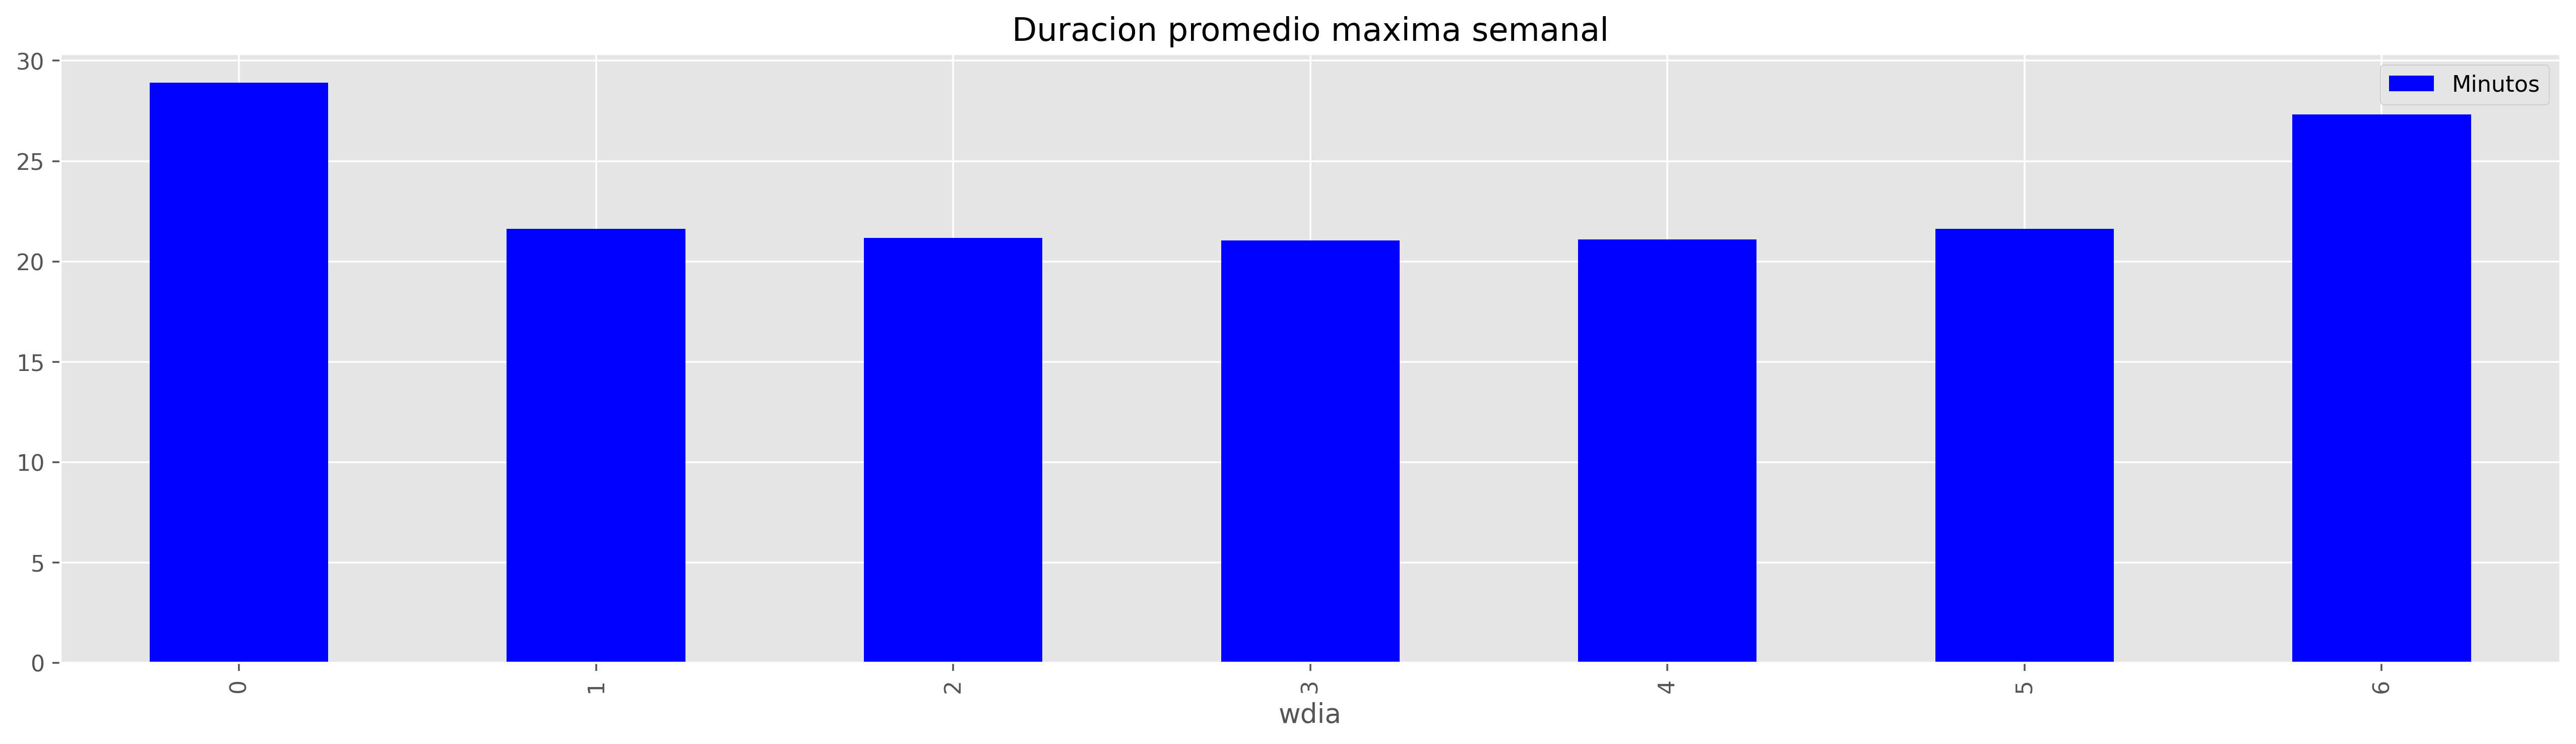

In [22]:
semana['duracion'].mean().plot( kind = 'bar', label = 'Minutos', color={  'blue' })
pyplot.legend( loc = 'best' )
pyplot.title( 'Duracion promedio maxima semanal' )
pyplot.show()

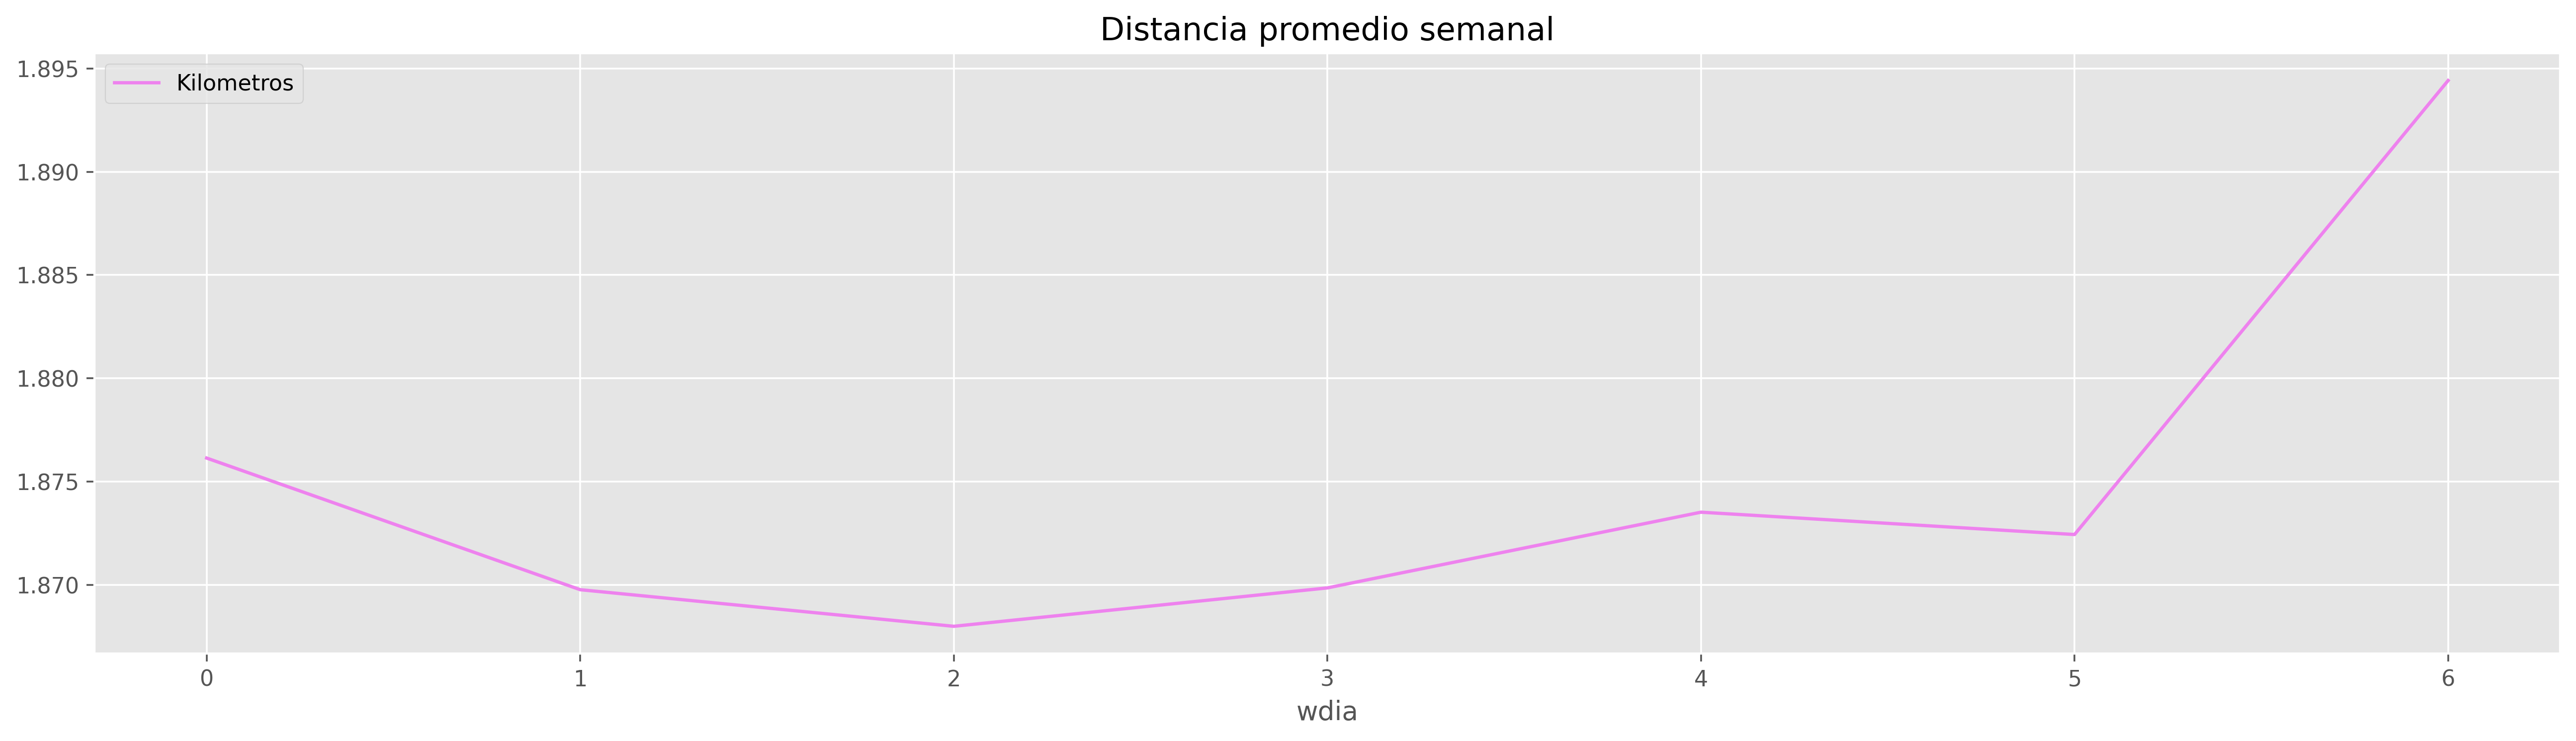

In [31]:
semana['distancia'].mean().plot( kind = 'line', label = 'Kilometros', color = { 'Kilometros': 'violet' })
pyplot.legend( loc = 'best' )
pyplot.title( 'Distancia promedio semanal' )
pyplot.show()

#### SEASONING HORARIO (dias no laborables)

In [9]:
horario = datasets['recorridos']['df'][ datasets['recorridos']['df']['dhabil'] == 0 ].groupby(
    [ 'origen_nombre', 'origen_id', 'hora']
).agg(
  viajes = ( 'hora',  'count' ),
  duracion = ( 'duracion_mins',  'mean' ),
  distancia = ( 'distancia',  'mean' ),
)
horario = horario.pivot_table(
    index = [ 'origen_nombre',  'origen_id', ],
    columns = ['hora'],
    values = ['viajes', 'duracion', 'distancia'],
    fill_value = 0,
).sort_values('origen_id')

In [11]:
# HORA PICO en (dias no laborables)
horario['viajes'].sum()[ 
    horario['viajes'].sum() == horario['viajes'].sum().max()
]

hora
17    14741
dtype: int64

In [12]:
# HORA MENOS USO PROMEDIO (dias no laborables)
horario['viajes'].mean().astype(int)[
    horario['viajes'].mean() == horario['viajes'].mean().min()
]

hora
4    3
dtype: int64

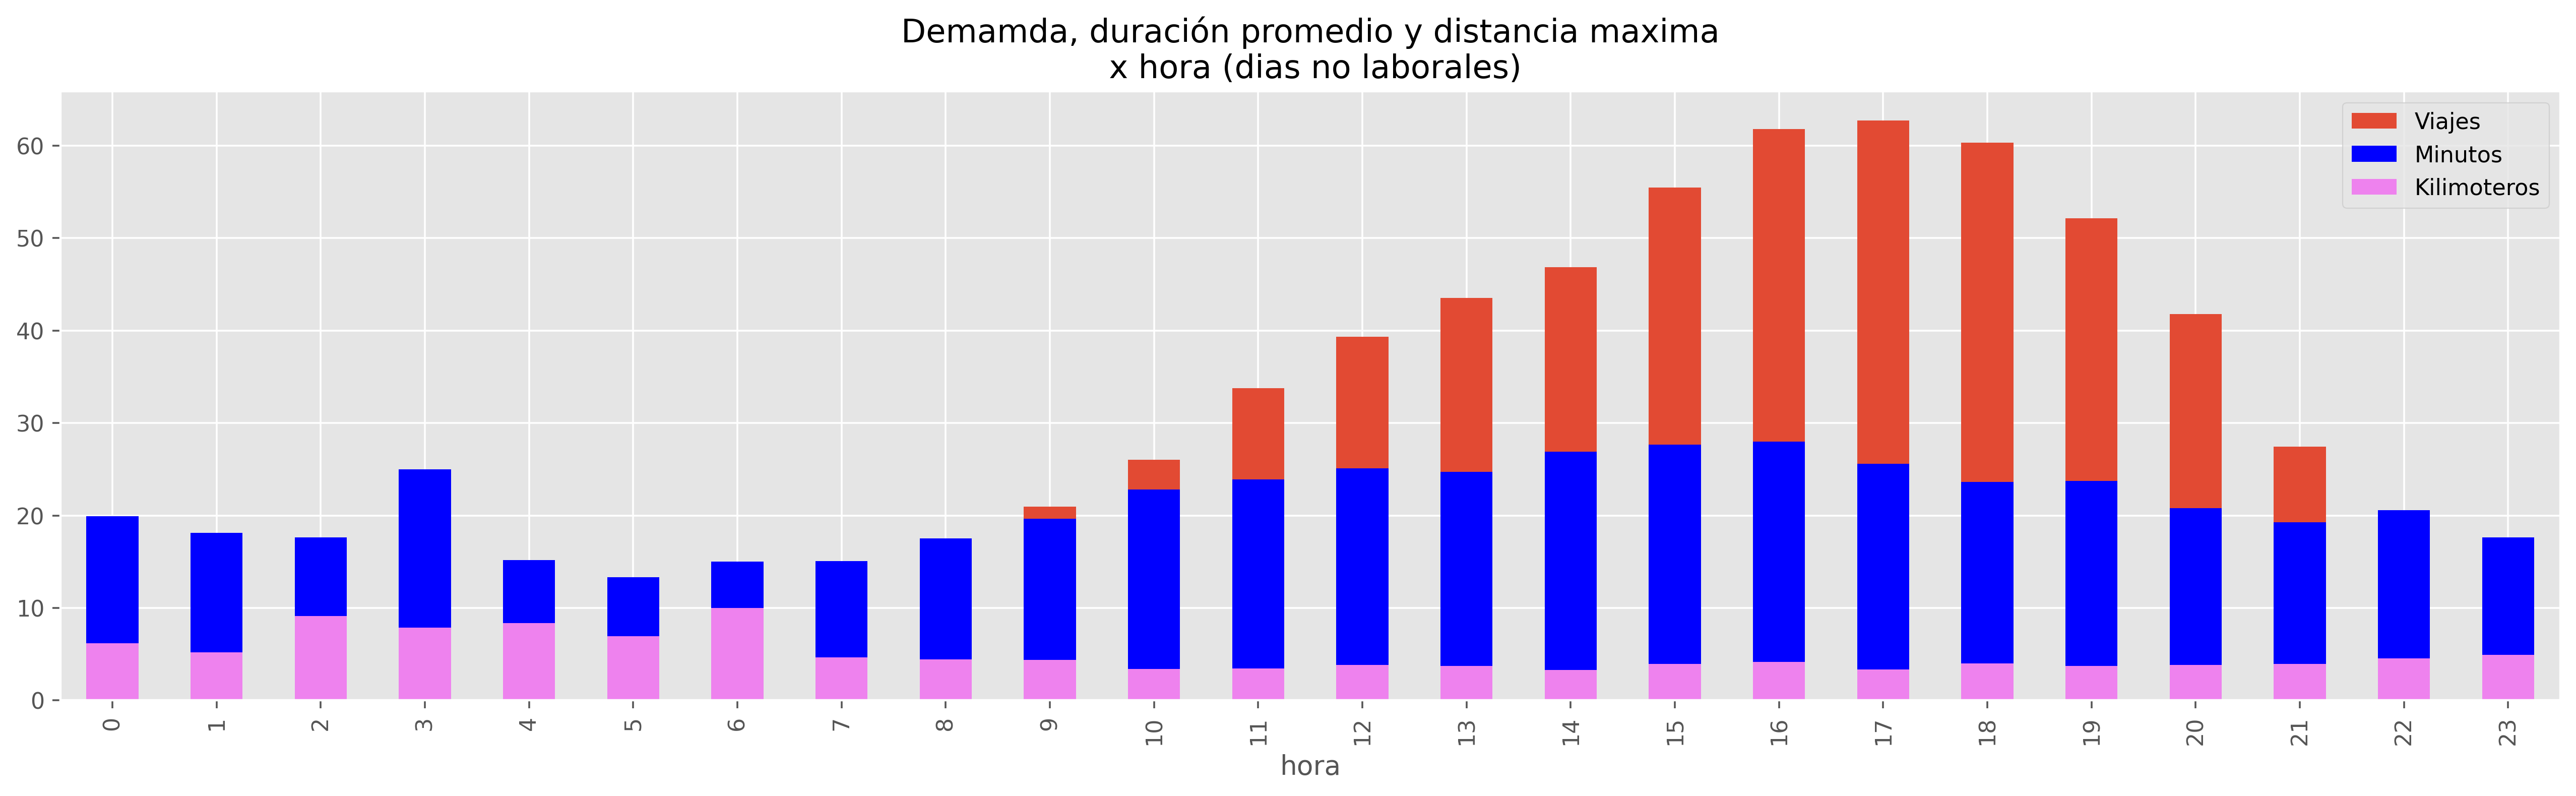

In [13]:
horario['viajes'].mean().plot( kind = 'bar', label = 'Viajes')
horario['duracion'].mean().plot( kind = 'bar',label = 'Minutos', color = 'blue')
horario['distancia'].max().plot( kind  = 'bar',label = 'Kilimoteros', color = 'violet' )
pyplot.legend( loc = 'best' )
pyplot.title( 'Demamda, duración promedio y distancia maxima\n x hora (dias no laborales)' )
pyplot.show()

## ESTACIONES
- Cantidad de vijes
- Matriz de viajes entre estaciones
- Relación con anclajes
    - Plazas en uso bicicletas en uso
    - Bicis ancladas x hora
- Distancias
    - Distancias a zonas de gran afluencia
- Desviación de la duración promedio

In [14]:
datasets['estaciones']['df'].head(20).set_index( 'id' ).drop( columns = 'oid' )

nombre  \
id                                
160     GODOY CRUZ Y LIBERTADOR   
14                     PACIFICO   
29            PARQUE CENTENARIO   
292               PLAZA BOLIVIA   
255       BARRANCAS DE BELGRANO   
147                CONSTITUCIÓN   
335             GENERAL URQUIZA   
1           FACULTAD DE DERECHO   
5                  PLAZA ITALIA   
391  PLAZA REPÚBLICA DE ECUADOR   
9              PARQUE LAS HERAS   
96                CARLOS GARDEL   
8                      CONGRESO   
121                       YATAY   
136                     ACEVEDO   
54            ACUÑA DE FIGUEROA   
74            INSTITUTO  LELOIR   
66                 BILLINGHURST   
399              GARCIA DEL RIO   
129                     VELASCO   

                                             direccion        lon        lat  \
id                                                                             
160                      GODOY CRUZ  3279 Y LIBERTADOR -58.420626 -34.572583   
14                   SANTA FE AV. & BULLRICH, INT. AV. -58.426385 -34.577424   
29                  AV. PATRICIAS ARGENTINAS & ESTIVAO -58.433556 -34.607942   
292                   OLLEROS AV. & DEL LIBERTADOR AV. -58.436113 -34.563539   
255  SUCRE, ANTONIO JOSE DE, MCAL. Y VERTIZ VIRREY AV. -58.448313 -34.559801   
147                         AVENIDA JUAN DE GARAY 1050 -58.380703 -34.626852   
335                       FIGUEROA ALCORTA & SARMIENTO -58.411275 -34.572165   
1                      AV. PRES. FIGUEROA ALCORTA 2120 -58.390598 -34.583749   
5                                   AV. SARMIENTO 2601 -58.420952 -34.580550   
391          FIGUEROA ALCORTA, PRES. AV. & DORREGO AV. -58.420705 -34.565203   
9                        2300 DIAZ, CNEL. AV. & FRENCH -58.407738 -34.585443   
96                         3302 GUARDIA VIEJA & AGUERO -58.411656 -34.602782   
8             CEVALLOS, VIRREY& YRIGOYEN, HIPOLITO AV. -58.389333 -34.609423   
121                               925 YATAY& HUMAHUACA -58.428507 -34.601174   
136                              ACEVEDO 220 Y PADILLA -58.442684 -34.599659   
54              LAVALLE & ACUÑA DE FIGUEROA, FRANCISCO -58.421982 -34.598119   
74       JUANA DE IBARBOUROU & AV PATRICIAS ARGENTINAS -58.434538 -34.604391   
66                                        3508 CARCOVA -58.413869 -34.594548   
399                             GARCIA DEL RIO & PINTO -58.476521 -34.550014   
129                           J.RAMIREZ DE VELASCO 285 -58.434873 -34.600276   

     anclajes  salidas  arribos  
id                               
160        20    47822    48368  
14         30    47577    44859  
29         30    46426    44650  
292        12    43534    44648  
255        24    40615    40928  
147        36    34565    35028  
335        20    34250    34697  
1          30    32959    33291  
5          42    32485    29968  
391        20    31449    32389  
9          24    30913    31078  
96         20    30788    31156  
8          24    30391    30556  
121        20    29903    29683  
136        20    29432    29617  
54         20    29334    29527  
74         30    28998    27177  
66         20    28609    28785  
399        28    27951    28535  
129        20    27380    27486

In [15]:
estaciones = datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id', 'fecha' ]
).agg(
  viajes = ( 'origen_id',  'count'),
  estaciones = ( 'origen_nombre',  'first'),
)
estaciones = estaciones.pivot_table(
    index = [ 'fecha'],
    columns = ['estaciones'],
    values = ['viajes'],
    fill_value = 0,
)

In [16]:
estaciones['viajes'].mean().mean()

30.100393914206204

In [17]:
print( estaciones['viajes'].mean().sort_values( ascending = False ).head( 10) )

estaciones
GODOY CRUZ Y LIBERTADOR       101.965885
PACIFICO                      101.443497
PARQUE CENTENARIO              98.989339
PLAZA BOLIVIA                  92.823028
BARRANCAS DE BELGRANO          86.599147
CONSTITUCIÓN                   73.699360
GENERAL URQUIZA                73.027719
FACULTAD DE DERECHO            70.275053
PLAZA ITALIA                   69.264392
PLAZA REPÚBLICA DE ECUADOR     67.053305
dtype: float64


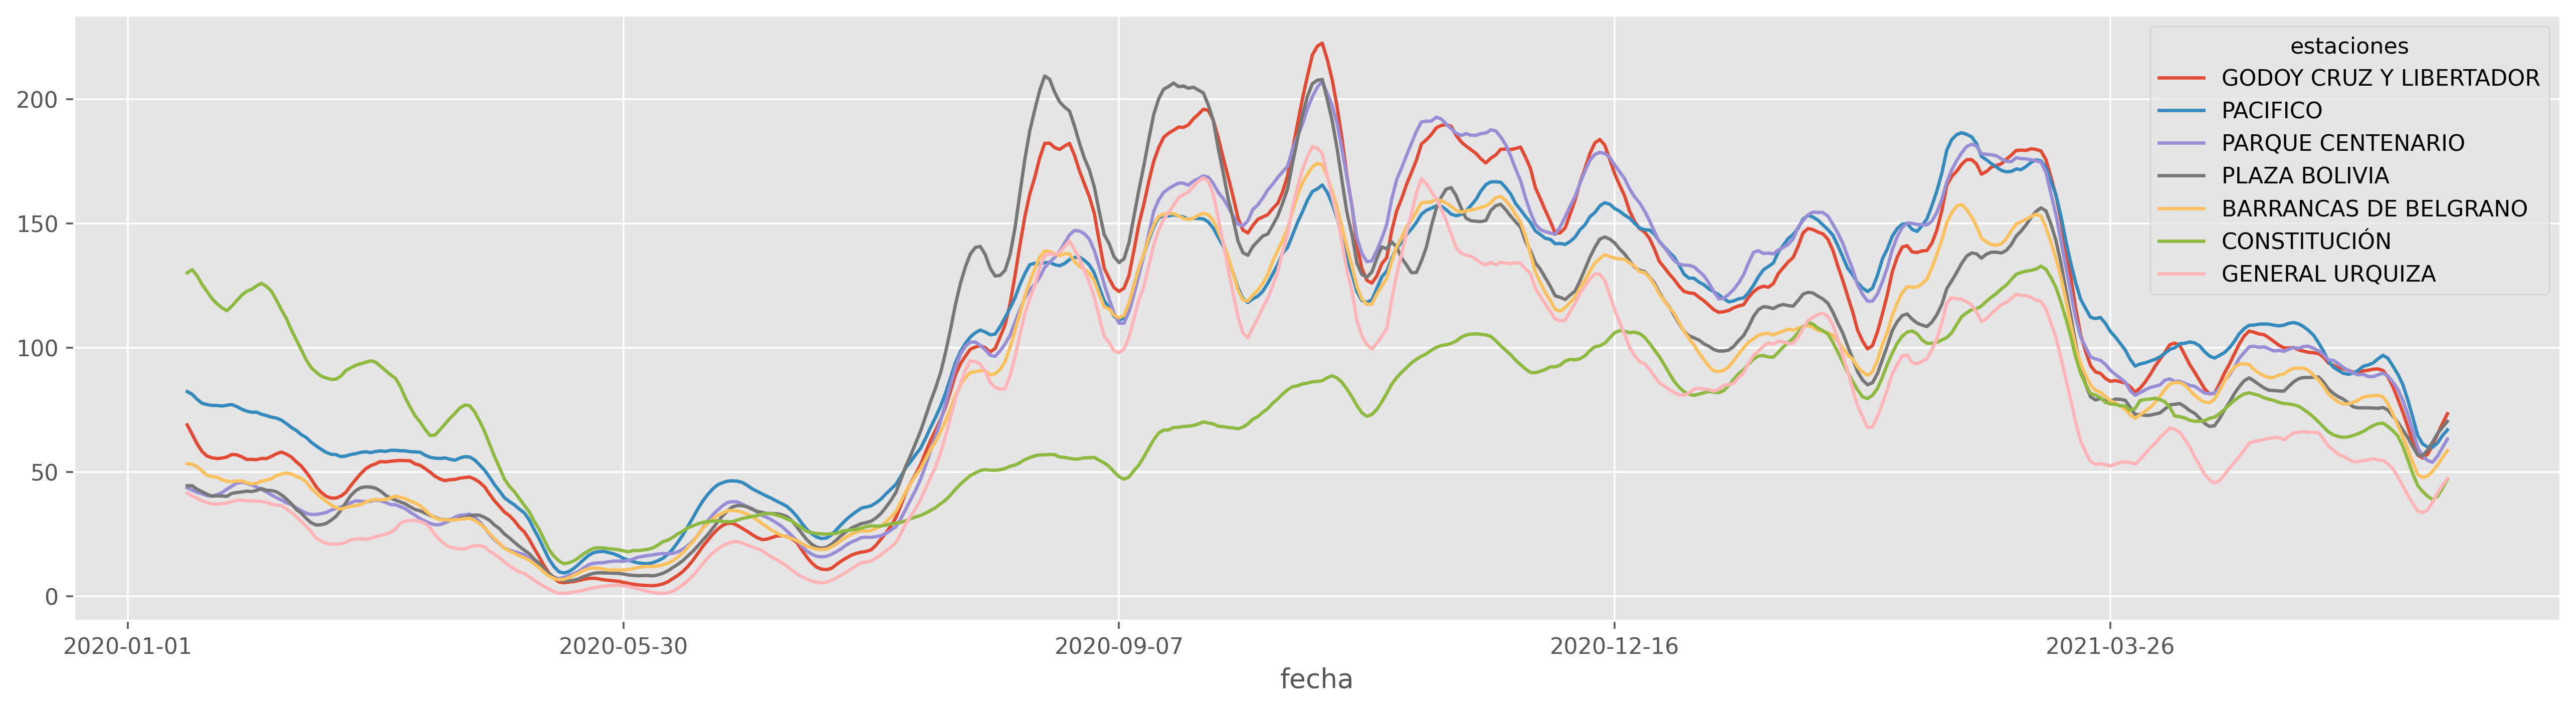

In [24]:
top = estaciones['viajes'].mean().max() - estaciones['viajes'].mean().mean()
tops = estaciones['viajes'].mean().sort_values( ascending = False )[ 
    estaciones['viajes'].mean() > top
]
estaciones['viajes'][ tops.keys() ].rolling(7).mean().rolling(7).mean().plot()
# pyplot.savefig('PNGs/demandas.png')
pyplot.show()

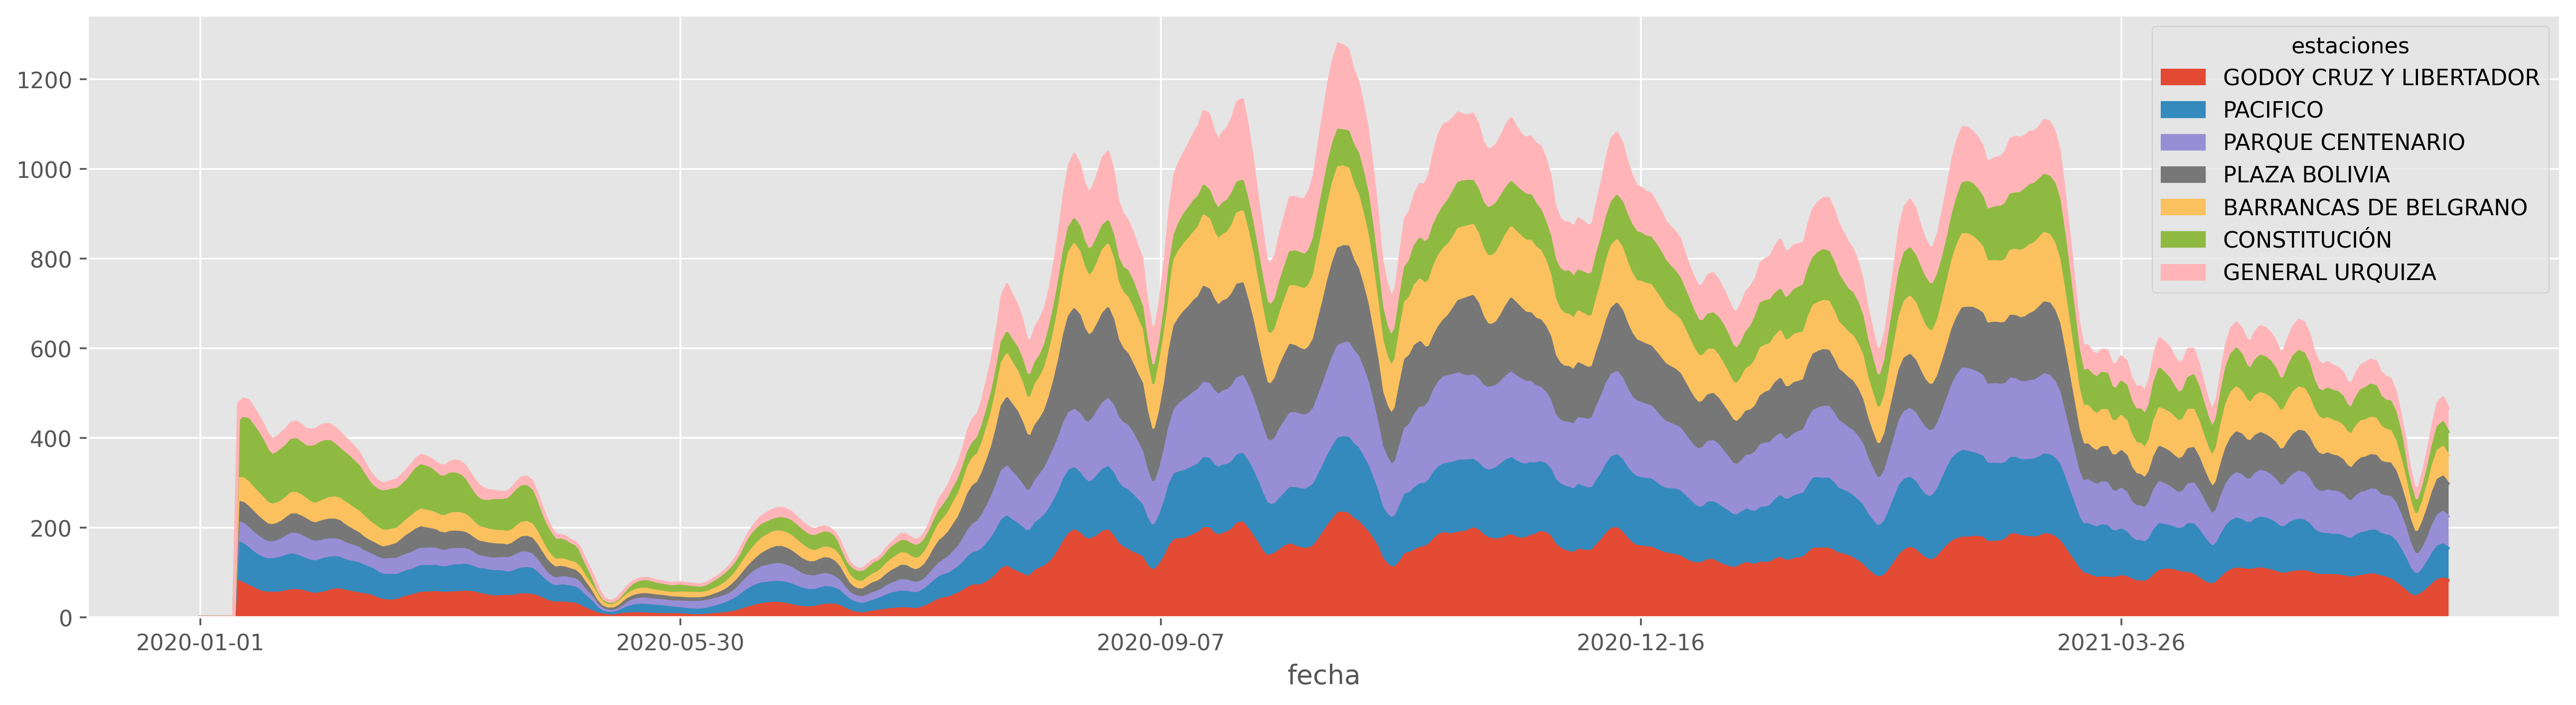

In [23]:
estaciones['viajes'][ tops.keys() ].rolling(5).mean().rolling(5).mean().plot( 
    kind = 'area'
)
# pyplot.savefig('PNGs/demandaA.png')
pyplot.show()

### IDAS / Vueltas
- Distancias ida
- Duraciones de estaciones a vueltas mismo destino
- deviations del promedio
- nada con distancias

In [16]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html 

# # 3 destinos mas q viajes  [333, 397, 47]
# viajes_x_estacion = datasets['recorridos']['df'][
#     (datasets['recorridos']['df']["destino_id"] != 47)
#     & (datasets['recorridos']['df']["destino_id"] != 333)
#     & (datasets['recorridos']['df']["destino_id"] != 397)
# ]

viajes_x_estacion = datasets['recorridos']['df'].groupby(
    [ 'origen_id','destino_id']
).agg(
    viajes = ('origen_id',  'count'),
)
viajes_x_estacion = viajes_x_estacion.pivot_table(
    index = [ 'origen_id'],
    columns = ['destino_id'], 
    values = ['viajes'],
    fill_value = 0,
#   aggfunc={ 'viajes' : 'mean', 'size' : 'sum'}
)
viajes_x_estacion['viajes']

destino_id   1    2    3    4     5    6    7    8    9    12   ...  381  384  \
origen_id                                                       ...             
1           3714  458   62  104   555   57   15  174  471  394  ...  379   13   
2            383  293   61   88    64   39    9   77   76   74  ...   93    3   
3             86   36  663  192     8  175   17  148   12   43  ...   10   11   
4             73   30  194  344    17  102   20   63   18   28  ...    4    2   
5            566   81   13   20  3490   18    8   65  367  164  ...  443  111   
...          ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
393          123  952   75   48    98    3   13   50   23  128  ...   86    0   
394            0    0    0    0     0    2    0    5    1    0  ...    0    0   
395            0    0    0    0     1    0    1    1    1    0  ...    0    0   
396           80    7    1    0    99    2    1    5  188   16  ...  304   11   
399           12    5    0    0    21    0    1    9   21    2  ...   55   20   

destino_id  387   391   393  394  395   396  397   399  
origen_id                                               
1             1   833   156    0    0    82    0    13  
2             0    40   940    0    0    11    0     2  
3             2     1    87    0    0     4    0     0  
4             3     2    48    0    0     2    0     2  
5             2  1030    51    0    0   146    0    36  
...         ...   ...   ...  ...  ...   ...  ...   ...  
393           2    11  1465    0    1     1    0     0  
394          23     3     0  136    0     0    0     0  
395           0     1     0    0   79     3    0     3  
396           0   612     0    0    1  2855    0  1101  
399           0   100     1    0    6  1255    0  8366  

[233 rows x 236 columns]

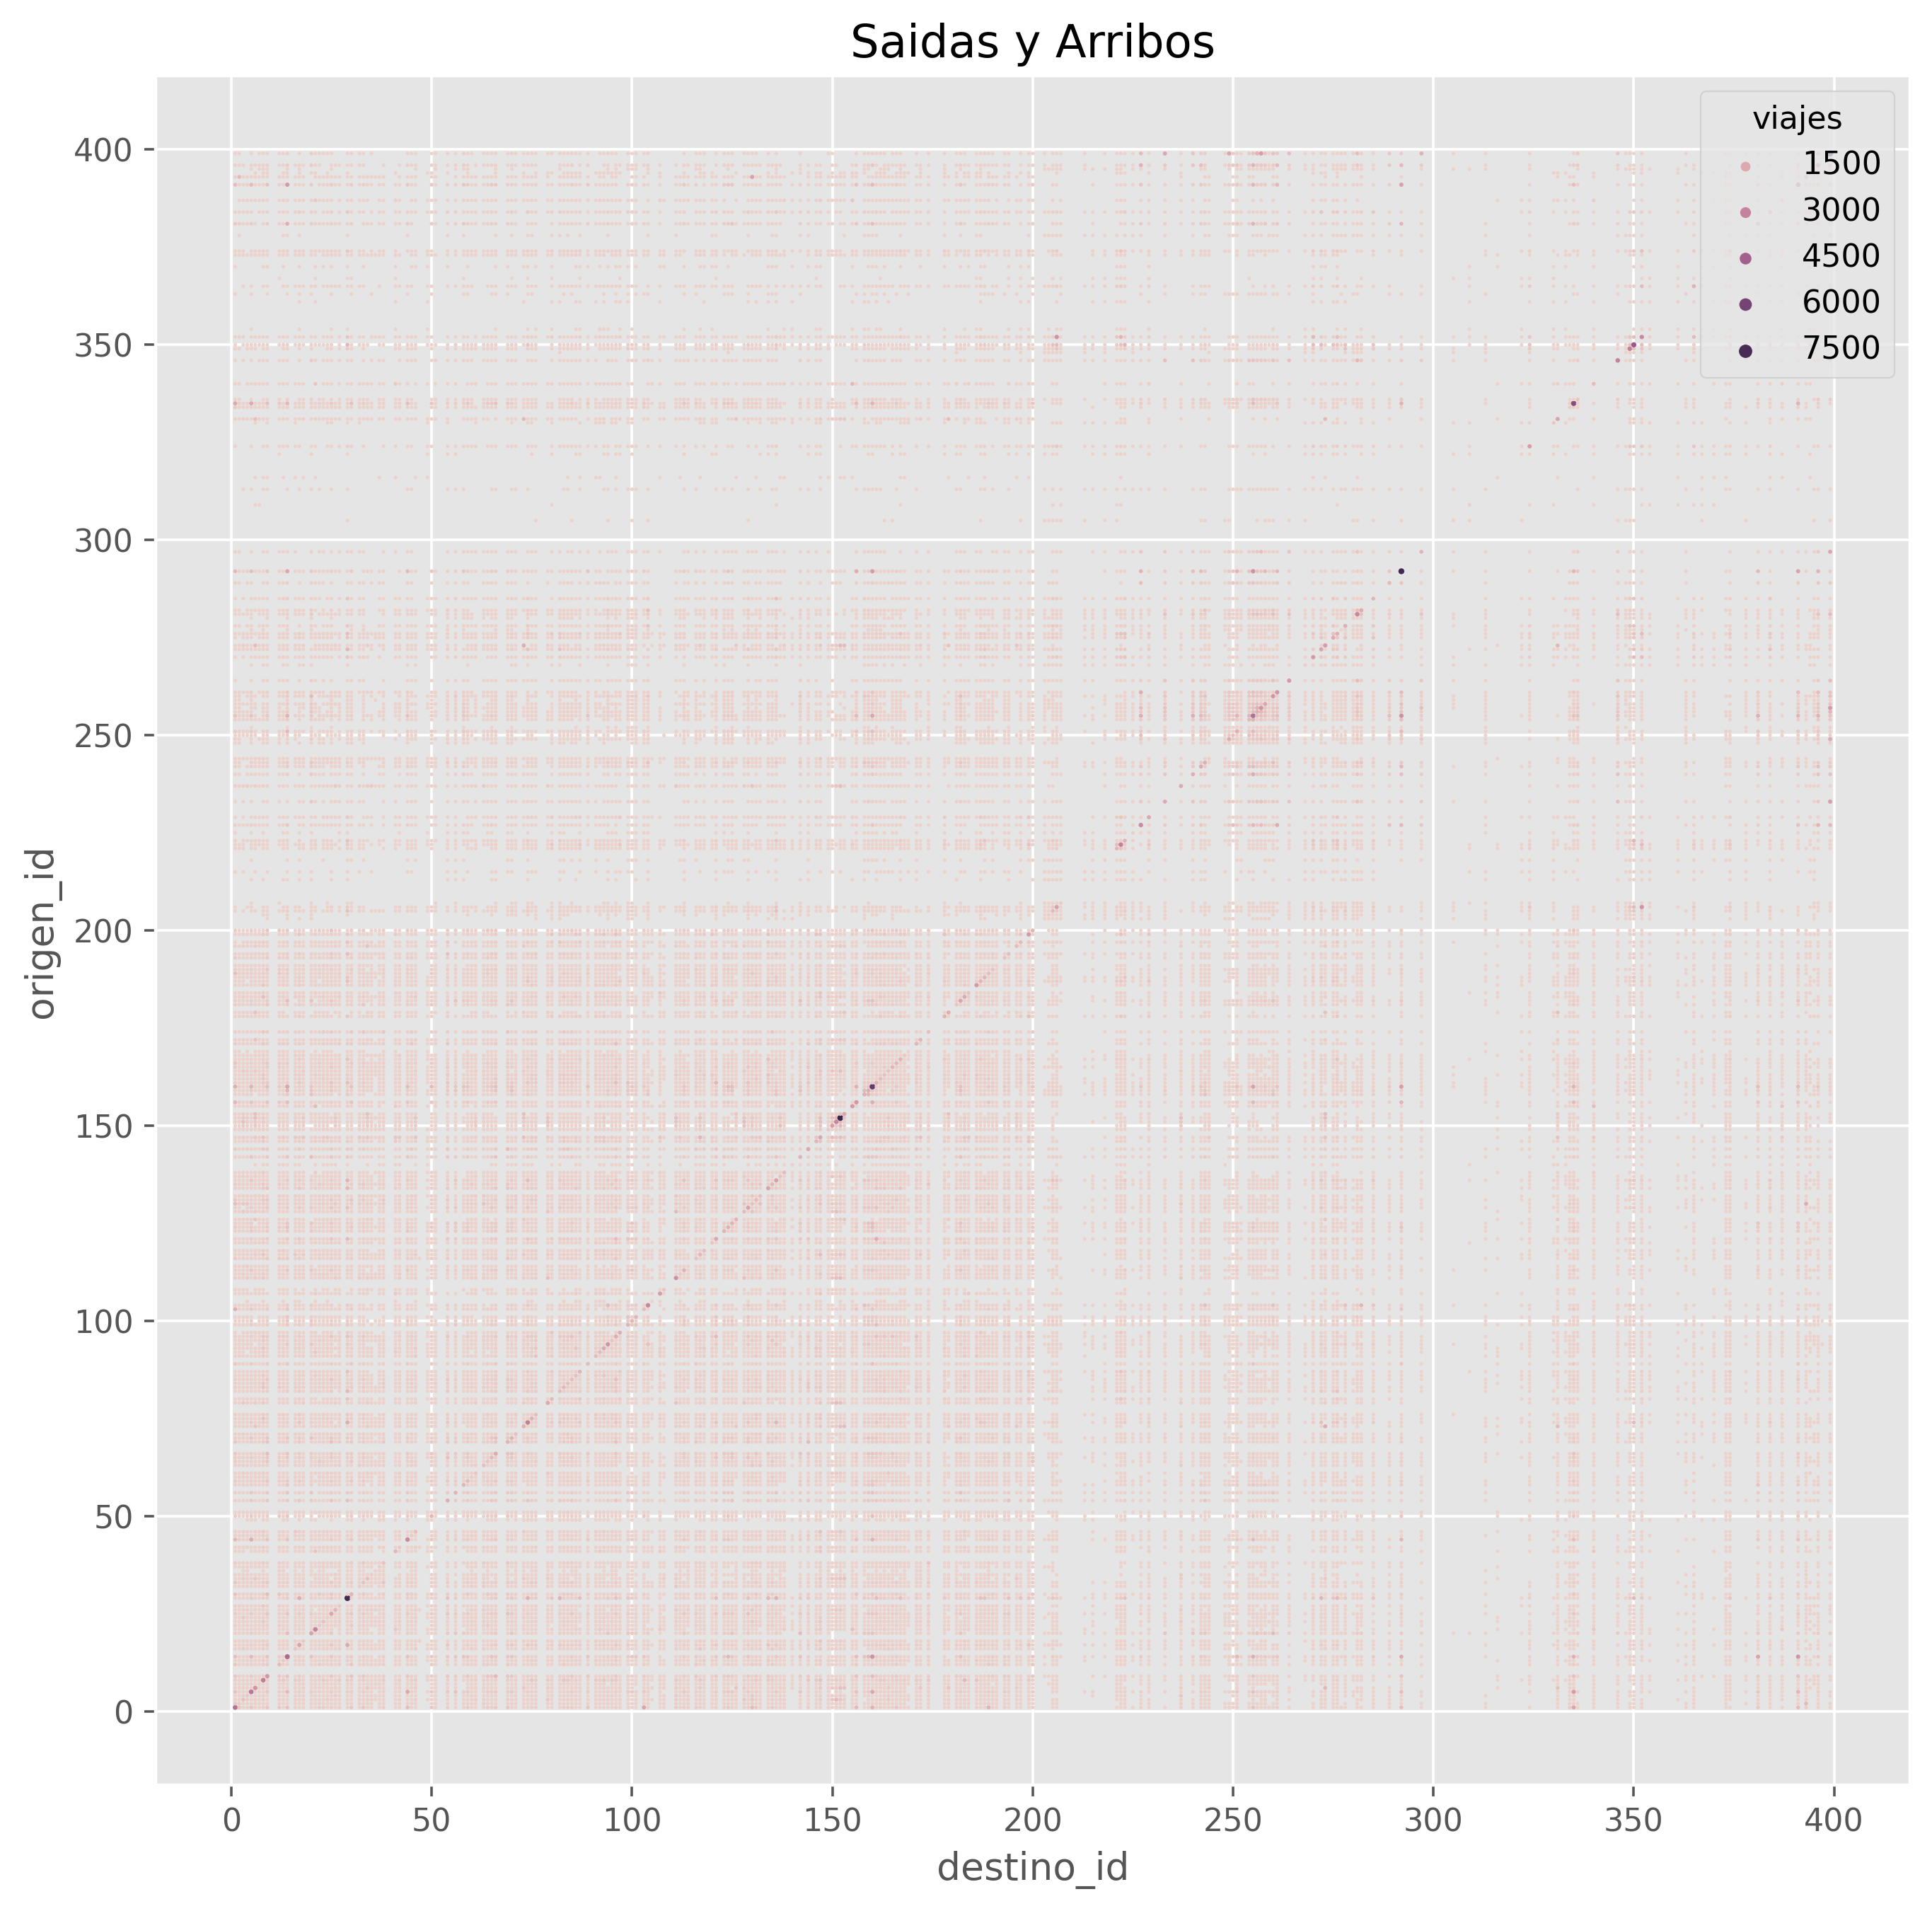

In [21]:
v = datasets['recorridos']['df']
# [
#     datasets['recorridos']['df']["dhabil"] == 1
# ]
v = v.groupby(
    [ 'origen_id','destino_id']
).agg(
    viajes = ('origen_id',  'count'),
    duracion = ('duracion_mins',  'mean'),
    distancia = ('distancia',  'mean'),
)
pyplot.figure( figsize = ( 10, 10 ) )
# velocidad = v.eval( "distancia / duracion").rename( "velocidad" )
sns.scatterplot(
    data = v,
    x = "destino_id",
    y = "origen_id",
    hue = "viajes",
    size = "viajes",
    sizes = ( 5, 15 ),
    linewidth = 0,
    alpha = 1,
    marker = '.'
)
pyplot.title( 'Saidas y Arribos' )
pyplot.savefig('PNGs/salidas-arribos.png')
pyplot.show()

## CLIMA

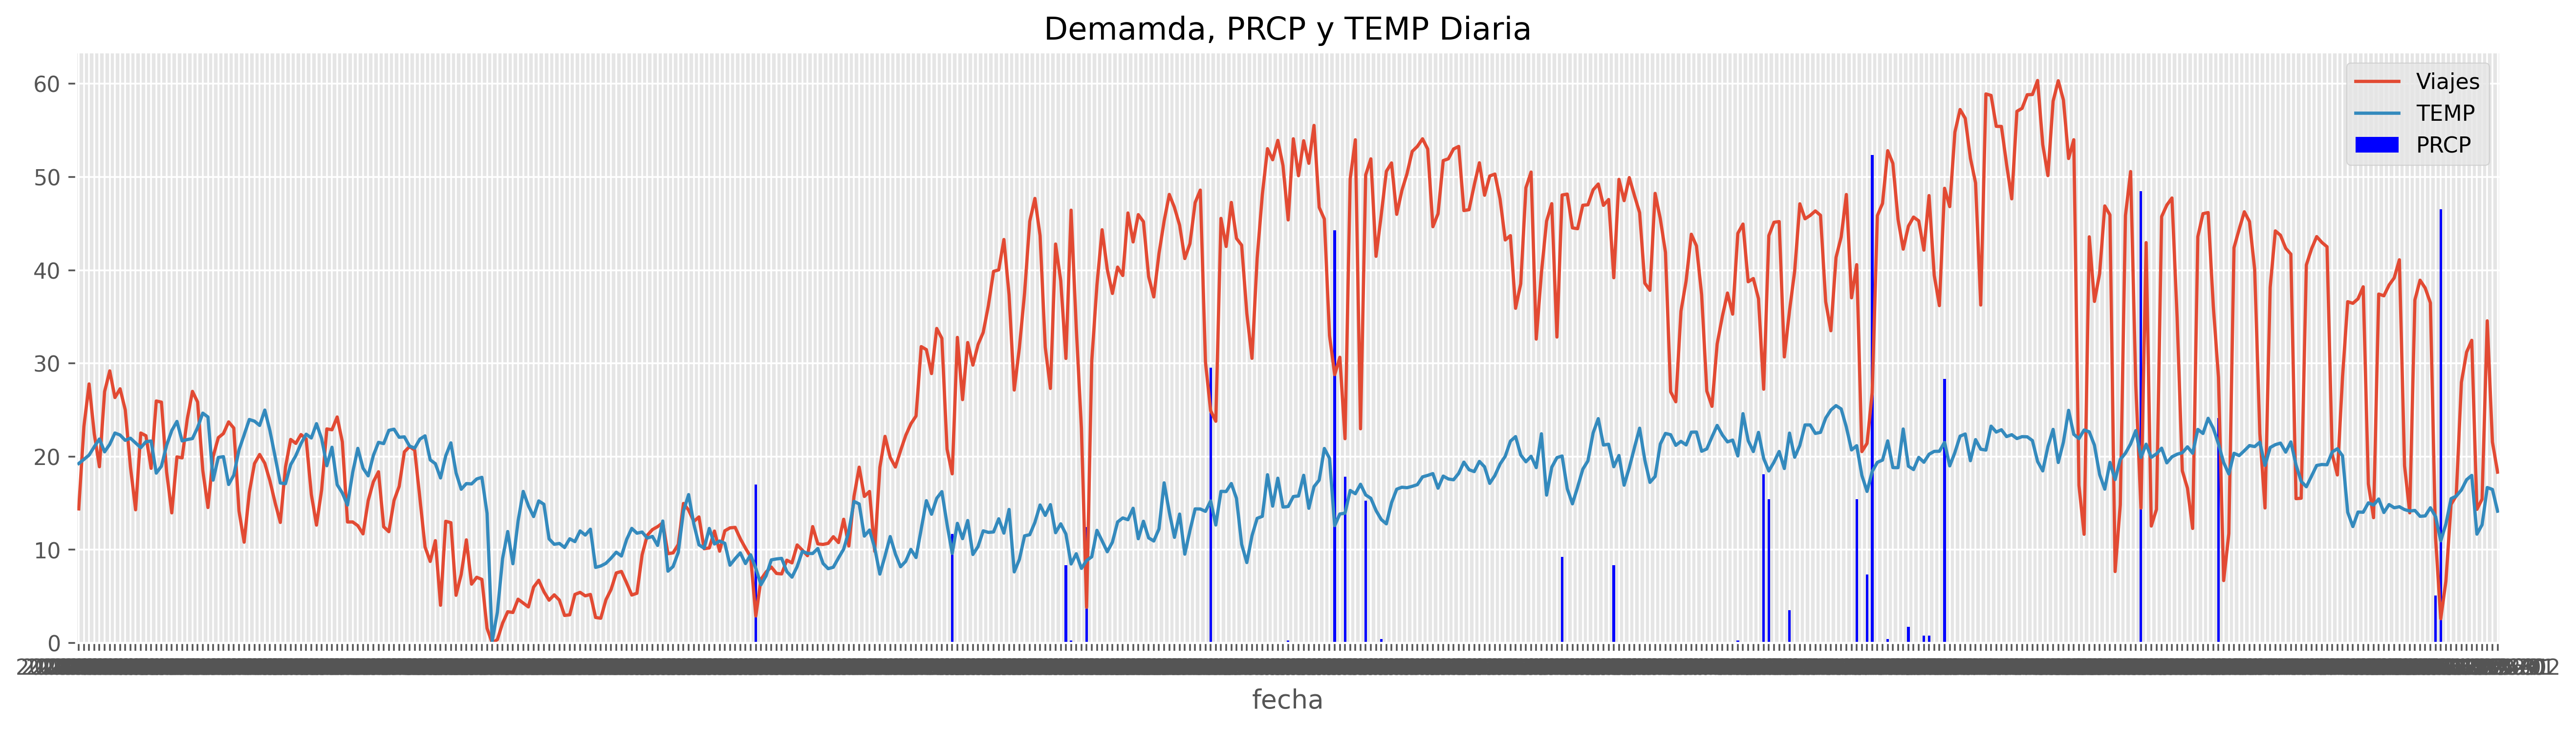

In [22]:
clima =  datasets['recorridos']['df'].groupby(
    ['origen_id','fecha']
).agg(
  viajes = ( 'origen_id',  'count'),
  PRCP = ( 'PRCP',  'mean'),
  TEMP = ( 'TEMP',  'mean'),
)
clima = clima.pivot_table(
    index = [ 'origen_id' ],
    columns = ['fecha'],
    values = ['viajes', 'PRCP', 'TEMP'],
    fill_value = 0,
)
clima['viajes'].mean().plot( label = 'Viajes' )
clima['PRCP'].mean().plot( kind='bar',label = 'PRCP', color = 'blue'  )
clima['TEMP'].mean().plot( label = 'TEMP' )
pyplot.legend( loc = 'best' )
# pyplot.axis('off')
pyplot.title( 'Demamda, PRCP y TEMP Diaria' )
pyplot.savefig('PNGs/clima.png')
pyplot.show()

### Gruoup by recurrent users top 20
- Durations mean max
- Cantidad de viajes
- Duraciones 

In [81]:
# GRUPING USERS
usurios = datasets['recorridos']['df'].groupby(
    ['usuario_id']
).agg(
  salidas = ( 'destino_id',  'count'),
  vueltas = ( 'vuelta',  'sum'),
  velocidad = ( 'velocidad_kmm',  'mean'),
  distancia = ( 'distancia',  'mean')
)
usurios = usurios[ ~usurios.isin( [np.nan, np.inf, -np.inf]).any(1) ]
usurios.sort_values( 'salidas' , ascending = False ).head( 20 )

salidas  vueltas  velocidad  distancia
usuario_id                                        
4240            947       29   0.176285   3.232693
12434           911      166   0.158612   3.461625
35506           795        9   0.140096   1.496327
14239           775       11   0.244620   5.151652
668737          748        2   0.145852   2.117099
16145           715        7   0.163259   1.670783
174799          713        9   0.169863   1.708219
101843          699       63   0.070245   1.352661
167637          698       19   0.123863   1.521662
101697          695       66   0.068520   1.327885
201181          672       11   0.153852   2.234435
268778          667        8   0.140959   2.803703
569922          654       17   0.140533   1.283761
19586           648        2   0.163103   0.951188
493435          641        9   0.121705   1.879236
693695          620       60   0.121515   2.409339
666883          613        4   0.192613   2.379723
59203           611        5   0.185461   3.152340
51346           609       56   0.142427   2.303153
37092           606       21   0.094762   1.740578

## Exploratory Spatial Data Analysis (ESDA)

https://alcidanalytics.com/p/geographic-heatmap-in-python

https://alysivji.github.io/getting-started-with-folium.html

https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

In [ ]:
# demanda_viz = derivados['recorridos']['df']
# # Fitro x dia
# demanda_viz = demanda_viz[ demanda_viz['fecha'] == '2020-01-01' ]
# demanda_viz

In [ ]:
# mexclar con long lat de estaciones
demanda_viz = datasets['recorridos']['df']
# Fitro x dia
fecha_viz   = '2020-03-01'
demanda_viz = demanda_viz[ demanda_viz['fecha'] == fecha_viz ]
demanda_viz = demanda_viz.groupby(
    ['origen_nombre', 'origen_id', 'hora', 'origen_lon','origen_lat']
).agg(
  salidas = ( 'hora',  'count' ),
  nombre  = ( 'origen_nombre',  'first' ),
  id      = ( 'origen_id',  'first' ),
  lon     = ( 'origen_lon',  'first' ),
  lat     = ( 'origen_lat',  'first' ),
)
# ).reset_index()
# df.set_index(['id', 'date', 'location'], append=True)
demanda_viz = demanda_viz.pivot_table(
    index = [ 'nombre',  'id', 'lon', 'lat'],
    columns = 'hora',
    values = 'salidas',
    fill_value = 0,
    # aggfunc = 'sum',
).sort_values('id')

In [ ]:
# import folium
# from folium import plugins
# # import pandas as pd
# # import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [ ]:
#... where m is my map object. And 5 is the time (seconds) to render the map.
# https://stackoverflow.com/questions/53565979/export-a-folium-map-as-a-png
# https://blog.ouseful.info/2015/12/15/grabbing-screenshots-of-folium-produced-choropleth-leaflet-maps-using-selenium/
# from time import sleep
import io
from PIL import Image

# !pip install folium selenium
import folium 
from folium.features import DivIcon
import selenium

import math
def mapear(x): 
    return int( (x / 10 ) * 255)

In [ ]:
# del m
m = ''
for h in demanda_viz.columns.to_list():
    del m
    m = folium.Map(
#         [ -34.606499,-58.381094 ], # obelisco
        [-34.606739, -58.435539 ], # parque centenario
        zoom_start = 13,
        zoom_control=False,
        scrollWheelZoom=False,
        dragging=False
#         tiles='stamentoner'
    )
    folium.map.Marker(
        [ -34.559920, -58.372211 ],
        icon = DivIcon(
            icon_size=(600,400),
            icon_anchor=(0,0),
            html='<div style='font-size: 20pt;font-family: monospace;'>' \
            + fecha_viz + ' HORA:' + '{:02d}'.format( h ) \
            + '</div>',
        )
    ).add_to(m)
    demandas = demanda_viz[h]
    estaciones = demanda_viz[h].reset_index()
    for e in estaciones.iterrows():
        estacion = e[1]
        folium.CircleMarker(
            [ estacion['lat'], estacion['lon'] ],
            radius = estacion[h] * 5, 
            popup = '{0}\:{1}\demanda:{2}'.format(
                estacion['id'],
                estacion['nombre'],
                str(estacion[h]),
            ),
            fill_color = '#{0:02x}{1:02x}{2:02x}'.format(
                mapear( int(estacion[h]) ),
                255 - mapear( int(estacion[h]) ) ,
                255 - mapear( int(estacion[h]) )
            )
        ).add_to(m)
#     m.save( 'ESDA/' + fecha_viz + '_' + '{:02d}'.format( h ) + '_' + 'map.html')
    
    img_data = m._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    img.save( 'ESDA/' + fecha_viz + '_' + '{:02d}'.format( h ) + '_' + 'map.png' )

In [ ]:
# !convert -density 72 'ESDA/2020-03-01_00_map.html' '2020-03-01_00_map.html'

In [ ]:
# !ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -acodec aac ESDA.mp4
!ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -an ESDA.mp4